____    
    
# Обучение с учителем: качество модели
_____
## Описание исследования

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 

_____
## Цель исследования
    
Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
    
_____
## Задачи исследования
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.
_____
### Исходные данные.
    
Мы будем работать с тремя датасетами:
1. market_file.csv
2. market_money.csv
3. market_time.csv
4. money.csv
    
1. market_file.csv Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - id — номер покупателя в корпоративной базе данных.
    - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
    - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
    - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
    - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
2. market_money.csv Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - Выручка — сумма выручки за период.
3. market_time.csv Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксировано общее время.
    - минут — значение времени, проведённого на сайте, в минутах.
4. money.csv Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - id — номер покупателя в корпоративной базе данных.
    - Прибыль — значение прибыли.
______

## Данное исследование разделим на несколько частей.

### Шаг 1. Загрузка данных:
* [1. Загрузим данные.](#1_1-bullet)
* [2. Проверим, что данные в таблицах соответствуют описанию.](#1_2-bullet)
* [3. Вывод.](#1_3-bullet)

### Шаг 2. Предобработка данных:
* [1. Приведение данных к нужным типам.](#2_1-bullet)
* [2. Нахождение и исправление аномалий и ошибок.](#2_2-bullet)
* [3. Вывод.](#2_3-bullet)

### Шаг 3. Исследовательский анализ данных
* [1. Проведение статистического анализа всех признаков и таблиц.](#3_1-bullet)
* [2. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.](#3_2-bullet)
* [3. Вывод.](#3_3-bullet)

### Шаг 4. Объединение таблиц
* [1. Объединим таблицы market_file.csv, market_money.csv, market_time.csv.](#4_1-bullet)
* [2. В итоговой таблице сделаем отдельный столбец для каждого периода по столбцам данные о выручке и времени на сайте.](#4_2-bullet)
* [3. Вывод.](#4_3-bullet)

### Шаг 5. Корреляционный анализ
* [1. Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.](#5_1-bullet)
* [2. Проверим на мультиколлинеарность и при необходимости устраните её.](#5_2-bullet)
* [3. Вывод.](#5_3-bullet)

### Шаг 6. Использование пайплайнов
* [1. Подготовка данных, обработка количественных и категориальных признаков, .](#6_1-bullet)
* [2. Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберем один гиперпараметр. Выберем подходящую для задачи метрику, аргументируем свой выбор. Используем эту метрику при подборе гиперпараметров.](#6_2-bullet)
* [3. Выберем лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.](#6_3-bullet)
* [4. Вывод.](#6_4-bullet)

### Шаг 7. Анализ важности признаков
* [1. Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.](#7_1-bullet)
* [2. Сделаем выводы о значимости признаков: какие признаки мало значимы для модели; какие признаки сильнее всего влияют на целевой признак; как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.](#7_2-bullet)
### Шаг 8. Сегментация покупателей
* [1. Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.](#8_1-bullet)
* [2. Выберем группу покупателей и предложим, как увеличить её покупательскую активность: графическое и аналитическое исследование, предложения по работе с сегментом.](#8_2-bullet)
* [3.  Сделаем выводы о сегментах: какой сегмент мы взяли для дополнительного исследования, какие предложения мы сделали и почему.](#8_3-bullet)
### Шаг 9. Общий вывод
* [1. опишем задачу; опишем исходные данные и проведённую предобработку; напишем, что сделали для поиска лучшей модели; укажем лучшую модель; добавим выводы и дополнительные предложения для выбранного сегмента покупателей.](#9_1-bullet)

## Исследование

### Шаг 1. Загрузка данных:<a id='#1_1-bullet'></a>

In [11]:
# Датасеты
import pandas as pd
# для создания двойного пути к базе данных
import os

# Математика
import numpy as np
from math import sqrt
import datetime as dt
import math as mth

# Факториалы для комбинаторики
#from math import factorial

# Статистика и тервер
import scipy.stats
from scipy import stats as st
from scipy.stats import binom, norm

# Графики
#!pip install matplotlib>=3.6.0 -q
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, rcParamsDefault

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
import seaborn as sns

# оставим всего три знака после запятой у чисел с плавающей точкой
pd.set_option('display.float_format', '{:.3f}'.format)

# Обязательно для нормального отображения графиков plt
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 16),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
sns.set_style('darkgrid')
sns.set_palette('Accent') 
sns.set_context('notebook', rc={'legend.fontsize': 10.0})
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Version
print(mpl.__version__)  #> 3.6.0
print(sns.__version__)  #> 0.9.0


# библиотеки для работы с дашбордами
import sys
#import getopt
#from sqlalchemy import create_engine

#!pip install phik -q
import phik
from phik import resources, report

#!pip install shap -q
import shap

#Библиотека sklearn
#!pip install scikit-learn==1.1.3 -q
import sklearn 

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    r2_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    roc_auc_score
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler,
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

3.8.0
0.12.2


In [12]:
# Задаем параметры для разделения данных
RANDOM_STATE = 13
TEST_SIZE = 0.20

In [14]:
pth1 = '/datasets/market_file.csv'
pth1_1 = 'market_file.csv'
pth2 = '/datasets/market_money.csv'
pth2_1 = 'market_money.csv'
pth3 = '/datasets/market_time.csv'
pth3_1 = 'market_time.csv'
pth4 = '/datasets/money.csv'
pth4_1 = 'money.csv'

def loadFile(path1, path2):
    if os.path.exists(path1):
        return pd.read_csv(path1)
    elif os.path.exists(path2):
        return pd.read_csv(path2)
    else:
        print("No file exists:", path1, path2)

market_file = loadFile(pth1, pth1_1)
market_money = loadFile(pth2, pth2_1)
market_time = loadFile(pth3, pth3_1)
money = loadFile(pth4, pth4_1)


No file exists: /datasets/market_file.csv market_file.csv
No file exists: /datasets/market_money.csv market_money.csv
No file exists: /datasets/market_time.csv market_time.csv
No file exists: /datasets/money.csv money.csv


Проверка данных:<a id='#1_2-bullet'></a>

In [ ]:
# Изучение датафрейма 'market_file' 
def inspectDataframe(df):
    df.info()
    return df.head()
inspectDataframe(market_file)

In [ ]:
inspectDataframe(market_money)

In [ ]:
inspectDataframe(market_time) 

In [ ]:
inspectDataframe(money)

**Вывод по загрузке данных**

1. market_file Данные о поведении покупателя: Данные успешно загружены и содержат информацию о покупательской активности, типе сервиса, активности на маркете, длительности, акционных покупках, популярной категории, среднем просмотре категорий за визит, неоплаченных продуктах и ошибке сервиса.
2. market_money Данные о выручке: Данные успешно загружены и содержат информацию о выручке за разные периоды.
3. market_time Данные о времени, проведенном на сайте: Данные успешно загружены и содержат информацию о времени, проведенном на сайте за разные периоды.
4. money Данные о прибыли: Данные успешно загружены и содержат информацию о прибыли.

Все данные в таблицах соответствуют описанию и готовы к дальнейшему анализу.


### Шаг 2. Предобработка данных: <a id='#2_1-bullet'></a>

In [ ]:
 def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print('Информация общая: ')
    df.info()
    print('---------------------------------------------------------------------------------------------------------')
    print('Статистики: ')
    display(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print('Пропущенные значения: ')
    print(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Дублированные данные: ')
    print(df.duplicated().sum())

In [ ]:
# Изучение датафрейма 'market_file'
df_review(market_file)

In [ ]:
# изменим тип данных с 'object' на 'float64'
market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].astype(float)
market_file['Акционные_покупки'] = market_file['Акционные_покупки'].astype(float)

In [ ]:
# проверим изменение типов данных с 'object' на 'float64'
market_file.info()

In [ ]:
# Изучение датафрейма 'market_money'
df_review(market_money)

In [ ]:
# изменим тип данных с 'object' на 'float64'
market_money['Выручка'] = market_money['Выручка'].astype(float)

In [ ]:
# проверим изменение типов данных с 'object' на 'float64'
market_money.info()

In [ ]:
# Изучение датафрейма 'market_time'
df_review(market_time)

In [ ]:
# Изучение датафрейма 'money'
df_review(money)

In [ ]:
df_full = [market_file, market_money, market_time, money]

In [ ]:
# Выявление уникальных значений категориальных столбцов
for df in df_full:
    for column in df.select_dtypes(include=['object']).columns:
        print(f'Уникальные значения для {column}:')
        print(df[column].unique())

In [ ]:
# Замена опечатки в столбце "Тип сервиса"
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')
# Проверка уникальных значений
print(market_file['Тип сервиса'].unique())

# Замена опечатки в столбце 'Период'
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
# Проверка уникальных значений
print(market_time['Период'].unique())

In [ ]:
# Проверка на выбросы с помощью boxplot
for df in df_full:
    for column in df.select_dtypes(include=[np.number]).columns:
        if column != 'id':
            # Вычисление размаха данных
            data_range = df[column].max() - df[column].min()
            
            # Настройка размера графика в зависимости от размаха данных
            plt.figure(figsize=(5, data_range / df[column].std()))
            df.boxplot([column])
            plt.title(f'Boxplot для {column}')
            plt.show()

Имеется явный выброс по выручке больше 100000 руб. проведем анализ аномального значения  

In [ ]:
print(market_money[market_money['Выручка'] > 100000])

In [ ]:
id_value = 215380

print("Данные о поведении покупателя:")
display(market_file[market_file['id'] == id_value])

print("\nДанные о выручке:")
display(market_money[market_money['id'] == id_value])

print("\nДанные о времени, проведенном на сайте:")
display(market_time[market_time['id'] == id_value])

print("\nДанные о прибыли:")
display(money[money['id'] == id_value])

Судя по активности пользователя и анализу предыдущих периодов, отсутствие высоких акционных покупок, есть предположение что аномальная выручка является выбросом. Необходимо удалить данные обо всех покупках пользователя: данные могут исказить результаты анализа и сделают  модель менее точной  

In [ ]:
market_file = market_file[market_file['id'] != id_value]
market_money = market_money[market_money['id'] != id_value]
market_time = market_time[market_time['id'] != id_value]
money = money[money['id'] != id_value]

In [ ]:
print("Данные о поведении покупателя для id 215380:")
display(market_file[market_file['id'] == id_value])

print("\nДанные о выручке для id 215380:")
display(market_money[market_money['id'] == id_value])

print("\nДанные о времени, проведенном на сайте для id 215380:")
display(market_time[market_time['id'] == id_value])

print("\nДанные о прибыли для id 215380:")
display(money[money['id'] == id_value])

**Вывод по предобработке данных**

Данные состоят из четырех наборов данных: Market File, Market Money, Market Time и Money. 

1. Market File: содержит 1300 записей с 13 столбцами. Пропущенные значения и дубликаты отсутствуют. в столбцах "Маркет_актив_6_мес", "Акционные_покупки" тип данных изменен на float. Замена опечатки в столбце "Тип сервиса" - 'стандартт' -> 'стандарт'  
2. Market Money: содержит 3900 записей с 3 столбцами. Пропущенные значения и дубликаты отсутствуют. В столбце "Выручка" типа данных  изменен на float. Имеелось аномальное значение выручки по пользователю, активность которого снизилась, было принято решение удалить данные, чтобы они не повлияли на модель. 
3. Market Time: содержит 2600 записей с 3 столбцами. Пропущенные значения и дубликаты отсутствуют.Замена опечатки в столбце 'Период' - 'предыдцщий_месяц' -> 'предыдущий_месяц'
4. Money: содержит 1300 записей с 2 столбцами. Пропущенные значения и дубликаты отсутствуют.

Все наборы данных имеют столбец 'id', по которому можем связывать данные между наборами.


### Шаг 3. Исследовательский анализ данных  <a id='#2_1-bullet'></a>

**Целью проекта является определение клиентов со снижением активности. Построим графики зависимостей по критериям, которые могут выявить закономерности по оставшимся признакам, исключим id из столбцов**

In [ ]:
market_file.info()

In [ ]:
# Определение столбца и категорий для анализа
column = 'Покупательская активность'
categories = ['Снизилась', 'Прежний уровень']
num_columns = market_file.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Получение списка всех столбцов в датафрейме, исключая 'id'
columns = [col for col in num_columns if col != 'id']

# Цикл по каждому столбцу для создания гистограммы и таблицы
for col in columns:
    plt.figure(figsize=(10, 6))
    # Цикл по каждой категории для создания гистограммы
    for category in categories:
        # Фильтрация данных по текущей категории
        data = market_file[market_file[column] == category]
        # Создание гистограммы для текущей категории
        plt.hist(data[col].dropna(), bins=20, alpha=0.3, label=category)
    
    # Настройка и отображение гистограммы
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend(loc='upper right')
    plt.show()
    
    # Вывод таблицы для каждого столбца
    print(f'Таблица для {col}:')
    for category in categories:
        # Фильтрация данных по текущей категории
        data = market_file[market_file[column] == category]
        print(f'\nКатегория: {category}')
        # Создание и вывод таблицы с описательной статистикой для текущей категории
        display(data[col].describe().to_frame().T)

In [ ]:
# Определение столбца и категорий для анализа
column = 'Покупательская активность'
categories = ['Снизилась', 'Прежний уровень']

ohe_columns = market_file.select_dtypes(include=['object']).columns.tolist()

# Получение списка всех столбцов в датафрейме, исключая 'id'
columns = [col for col in ohe_columns if col != 'id' and col != 'Покупательская активность']

# Цикл по каждому столбцу для создания гистограммы и таблицы
#sns.countplot(x='Тип сервиса', hue=column, data=market_file)

for col in columns:
    plt.figure(figsize=(10, 6))
    # Цикл по каждой категории для создания гистограммы
    for category in categories:
        # Фильтрация данных по текущей категории
        data = market_file[market_file[column] == category]
        # Создание гистограммы для текущей категории
        #plt.hist(data[col].dropna(), bins=20, alpha=0.3, label=category)
        sns.countplot(x=col, hue='Покупательская активность', data=market_file)
    
    # Настройка и отображение гистограммы
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.legend(loc='upper right')
    plt.show()
    
    # Вывод таблицы для каждого столбца
    print(f'Таблица для {col}:')
    for category in categories:
        # Фильтрация данных по текущей категории
        data = market_file[market_file[column] == category]
        print(f'\nКатегория: {category}')
        # Создание и вывод таблицы с описательной статистикой для текущей категории
        display(data[col].describe().to_frame().T)

In [ ]:
market_time.info()

In [ ]:
market_time.describe()

In [ ]:
sns.countplot(x='минут', hue='Период', data=market_time)

Распределение графика нормальное. пик примерно на 13 минуте, также в текущем периоде видим большую активность пользователей

In [ ]:
market_money.info()

In [ ]:
sns.histplot(x='Выручка', hue='Период', data=market_money)

Распределение графика нормальное. Медиана около 5000, в препредыдущем периоде выручка была существенно больше. 

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [ ]:
# преобразование данных
market_money = market_money.pivot(index='id', columns='Период', values='Выручка')
market_money.columns = ['выручка_' + str(col) for col in market_money.columns]
# упорядочивание столбцов
market_money = market_money[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']]
# фильтрация данных
market_money = market_money[(market_money['выручка_препредыдущий_месяц'] != 0) & (market_money['выручка_предыдущий_месяц'] != 0) & (market_money['выручка_текущий_месяц'] != 0)]
display(market_money)

Вывод: 

С учетом удаления аномальных значений, в общем датафрейме удалили данные по 4-ем пользователям. Итого, в данных отсутствуют записи с пользователями, у которых не было покупок за последние 3 месяца

In [ ]:
print("Статистика market_file:")
display(market_file.describe())
print("\nСтатистика  market_money:")
display(market_money.describe())
print("\nСтатистика  market_time:")
display(market_time.describe())
print("\nСтатистика  money:")
display(money.describe())

Вывод:

Market File: Этот набор данных содержит 1299 записей. Среднее значение для столбца 'Маркет_актив_6_мес' составляет примерно 4.26, а для столбца 'Маркет_актив_тек_мес' - примерно 4.01. Столбец 'Длительность' имеет среднее значение около 601.9. Все данные не имеют аномалий. 

Market Money: Этот набор данных содержит 1296 записей. Среднее значение для столбца 'Выручка' составляет примерно 4999. Все данные не имеют аномалий.

Market Time: Среднее значение для столбца 'минут' составляет примерно 13.34. Все данные не имеют аномалий.

Money: Среднее значение для столбца 'Прибыль' составляет примерно 4. Все данные не имеют аномалий.



Инсайты:

- Покупательская активность: В категории "Снизилась" 497 наблюдений, а в категории "Прежний уровень" - 802 наблюдения.
- Тип сервиса: В обеих категориях большинство клиентов выбирают "стандарт".
- Разрешить сообщать: Большинство клиентов в обеих категориях разрешили отправку сообщений.
- Маркет_актив_6_мес: Средняя активность на рынке за последние 6 месяцев выше у клиентов, чья активность осталась на прежнем уровне.
- Маркет_актив_тек_мес: Средняя активность на рынке в текущем месяце примерно одинакова в обеих категориях.
- Длительность: Клиенты, чья активность снизилась, в среднем проводят больше времени. Аномалия, необходимо обратить внимание
- Акционные_покупки: Клиенты, чья активность снизилась, в среднем совершают больше акционных покупок. Возможно, для удержания таких клиентов стоит предлагать больше акционных товаров или дополнительные промокоды
- Популярная_категория: В обеих категориях наиболее популярной является категория "Товары для детей".
- Средний_просмотр_категорий_за_визит: Клиенты, чья активность осталась на прежнем уровне, в среднем просматривают больше категорий за визит.
- Неоплаченные_продукты_штук_квартал: Клиенты, чья активность снизилась, в среднем имеют больше неоплаченных продуктов за квартал.
- Ошибка_сервиса: Клиенты, чья активность осталась на прежнем уровне, в среднем сталкиваются с большим количеством ошибок сервиса. Логично. Предполагаю, что данный признак можно будет исключить. проверим это в дальнейшем
- Страниц_за_визит: Клиенты, чья активность осталась на прежнем уровне, в среднем просматривают больше страниц за визит. Логично. Предполагаю, что данный признак можно будет исключить. проверим это в дальнейшем

 ### Шаг 4. Объединение таблиц<a id='#3_1-bullet'></a>

In [ ]:
# преобразование данных
market_time = market_time.pivot(index='id', columns='Период', values='минут')
market_time.columns = ['минут_' + str(col) for col in market_time.columns]

display(market_time)

In [ ]:
# объединение данных
market_file = market_file.merge(market_money, on='id', how='inner')
market_file = market_file.merge(market_time, on='id', how='inner')

In [ ]:
df_review(market_file)

### Шаг 5. Корреляционный анализ  <a id='#5_1-bullet'></a>

In [ ]:
# Удаление столбца 'id'
data_without_id = market_file.drop('id', axis=1)

# Вычисление матрицы корреляции Phi_K для данных без 'id'
phik_matrix = data_without_id.phik_matrix()

# Визуализация матрицы корреляции Phi_K
plt.figure(figsize=(15, 10))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Матрица корреляции Phi_K")
plt.show()

**Вывод по матрице корреляции между покупательской активностью и оставшимися признаками:**

Признаки с сильной корреляцией:
- Страниц_за_визит 0,75
- минут_предыдущий_месяц 0,69
- минут_текущий_месяц 0,58

Признаки с умеренной корреляцией:
- Маркет_актив_6_мес и Средний_просмотр_категорий_за_визит - 0,54
- Акционные_покупки и Неоплаченные_продукты_штук_квартал - 0,51
- выручка_предыдущий_месяц - 0,50

Признаки с высокой корреляции следует рассмотреть на мультиколлинеарность. Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. В такой ситуации лишние коррелирующие признаки нужно удалять из обучающей выборки. Коэффициенты корреляции в нашей выборке не подвержены мультиколлинеарности

Признаки с похожей семантикой или логичными причинно-следственными связями можно рассмотреть как претендентов на исключение одного из признаков или генерирование нового признака, как например Маркет_актив_6_мес и Средний_просмотр_категорий_за_визит

Признаки с низкой корреляцией стоит оставить и рассмотреть альтернативными способами анализа например методом Шепли, для того чтобы не потерять более сложные взаимосвязи в данных


### Шаг 6. Использование пайплайнов <a id='#6_1-bullet'></a>

In [ ]:
df_mod = market_file.drop('id', axis=1)

In [ ]:
df_mod['Покупательская активность'] = df_mod['Покупательская активность'].replace({'Снизилась': 1, 'Прежний уровень': 0})

In [ ]:
# Определение целевого признака
target = 'Покупательская активность'

# Получение списка всех признаков, за исключением целевого
features = df_mod.columns.drop(target)

# Определение числовых и текстовых признаков
num_columns = df_mod[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
ohe_columns = df_mod[features].select_dtypes(include=['object']).columns.tolist()


# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    df_mod.drop(target, axis=1), # Независимые переменные
    df_mod[target], # Зависимая переменная
    test_size=TEST_SIZE, # Размер тестовой выборки
    random_state=RANDOM_STATE # Случайное состояние для воспроизводимости
)


ohe_pipe = Pipeline(
    [('ohe', OneHotEncoder(drop='first', sparse=False))
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)


In [ ]:
# создаем список словарей для каждой модели
param_grid = [
        # словарь для модели DecisionTreeClassifier()
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2,10),
        'model__max_features': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  'passthrough']  
    },
    # словарь для модели KNeighborsClassifier()     
    {
        'model': [KNeighborsClassifier()],        
        'model__n_neighbors': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),'passthrough']    
    },
# словарь для модели LogisticRegression()    
    {
        'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=RANDOM_STATE)],
        'model__C': range(1,5),        
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),'passthrough']  
    },

    # словарь для модели SVC()
    {
        'model': [SVC(probability=True, random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), 'passthrough']
}
]

grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

In [ ]:
y_test_pred = grid.predict(X_test)
roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc:.4f}')

# Предсказание вероятностей классов
probabilities = grid.predict_proba(X_test)

# Извлечение вероятностей для класса 1
probabilities_one = probabilities[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, probabilities_one)

print(f'Метрика ROC-AUC для класса 1 на тестовой выборке: {roc_auc:.4f}')

**Обоснование выбора метрики**

1. По условию задачи нам необходимо построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца - это бинарная классификация, при этом на этапе исследовательского анализа было выявлено что соотношение категории покупателей со снижением активности меньше, но незначительно.
Предлагаем оценивать качество подобранной модели метрикой ROC-AUC — это всеохватывающая метрика качества классификации. Она учитывает работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного. Данную метрику можно использовать для оценки качества признаков. Когда необходимо оценить качество работы модели вне зависимости от выбранного порога вероятности. Метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими.
Считаем, что значения признака — это ответы нашего алгоритма (не обязательно они должны быть нормированы на отрезок [0, 1], ведь нам важен порядок). Тогда выражение 2×|AUC_ROC — 0.5| вполне подойдёт для оценки качества признака: оно максимально, если по этому признаку 2 класса строго разделяются и минимально, если они «перемешаны».
2.  В нашей «непрерывной» постановке задачи (когда объекты двух классов описываются плотностями) AUC ROC имеет вероятностный смысл: это вероятность того, что случайно взятый объект класса 1 имеет оценку принадлежности к классу 1 выше, чем случайно взятый объект класса 0. Поэтому метрику нужно считать по вероятностям классов probabilities = model.predict_proba(features) probabilities_one = probabilities[:, 1] print('Площадь ROC-кривой:', roc_auc_score(target, probabilities_one)) А внутри кросс-валидации мы просто указываем метрику ROC_AUC и там никаких вероятностей гне требуется, так как эта метрика не дифференцируема на всем промежутке, то разработчики кросс-валидации меняют ее на эквивалент Gini, так как Gini = 2 ×AUC_ROC – 1:

    - AUC ROC не зависит от строго возрастающего преобразования ответов алгоритма (например, возведения в квадрат), поскольку зависит не от самих ответов, а от меток классов объектов при упорядочивании по этим ответам.
    - Часто используют критерий качества Gini, он принимает значение на отрезке [–1, +1] и линейно выражается через площадь под кривой ошибок: Gini = 2 ×AUC_ROC – 1
    - AUC ROC можно использовать для оценки качества признаков. Считаем, что значения признака — это ответы нашего алгоритма (не обязательно они должны быть нормированы на отрезок [0, 1], ведь нам важен порядок). Тогда выражение 2×|AUC_ROC — 0.5| вполне подойдёт для оценки качества признака: оно максимально, если по этому признаку 2 класса строго разделяются и минимально, если они «перемешаны».
 
3. "print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)" - это скопипащено из задания в лекциях :)
 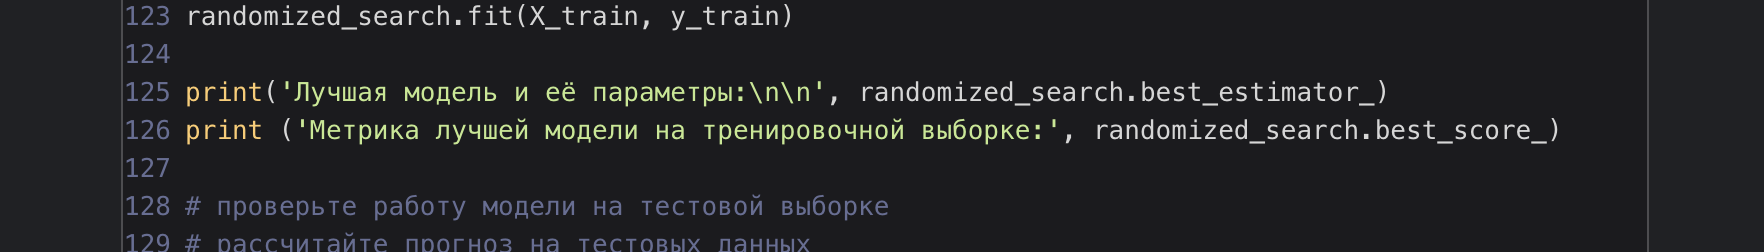
 
 https://practicum.yandex.ru/learn/data-scientist-plus/courses/12776ba9-ee96-4a2b-9b6c-8f9ccd114cea/sprints/239704/topics/ac9f6f00-2309-4257-88ae-c1920123baf3/lessons/7ac9edb9-e2d9-4020-ac09-8401fc16f3ba/ задание 1. 
 
 "мы не выбираем лучшую модель по результату на тренировочный выборке, потому что она ничего не показывает. Например если взять дерево решение достаточно большой глубины, то метрика на тренировочной будет равна 100%, но это результат запоминание данных, а не обобщения." Согласна,  но мы выведем метрику ROC-AUC лучшей модели — командой .best_score_, смысл этого атрибута - лучшая метрика при кросс-валидации. или ты имеешь в виду почему в параметре scoring я сразу указываю эту метрику? Ссылки нет в предложении "Можешь посмотреть тут с помощью VPN о логике использования выборок"  C выборками четко понимаю что на тренировочной метрика может быть 100% и нам важна она на тестовой выборке. 
 
4. по комментарию ниже разбила ячейку на несколько по логическим смыслам и вынесла переменные в блок импортов 


**Вывод**
Параметры лучшей модели:
- LogisticRegression(C=1, penalty='l1', random_state=13, solver='liblinear') 
- OneHotEncoder для категориальных признаков
- MinMaxScaler для числовых признаков.
- Метрика лучшей модели на тренировочной выборке 0.8998
- Метрика ROC-AUC на тестовой выборке (0.8999)
- Метрика ROC-AUC вероятностей для класса 1 на тестовой выборке 0.9123

Модель с параметрами выше планируем использовать в дальнейшеи исследовании для прогнозирования покупательской активности

### Шаг 7. Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. Вычислим, как отдельный признак помог присвоить модели итоговое значение целевого.

In [ ]:
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.Explainer(grid.best_estimator_.named_steps['model'], X_train_2)
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names) 
shap_values = explainer(X_test_2)
display(shap.plots.bar(shap_values, max_display=30))

In [ ]:
shap.plots.beeswarm(shap_values, max_display=300) 

Диаграмма shap.plots.beeswarm — это один из вариантов визуализации вклада признаков в каждое предсказание модели. 

На графике точками отображены все наблюдения из выборки.
На оси X отложены значения Шепли, на оси Y — признаки модели, расположенные сверху вниз в порядке убывания средних SHAP‑значений.

Негативные значения Шепли слева от центральной вертикальной линии означают, что признак склоняет модель отнести объекты к классу 0 (покупательская активность не снизится), а положительные справа — к классу 1 (покупательская активность снизится).

Чем толще линия по вертикали, тем больше наблюдений сгруппированы вместе: у них близкие значения Шепли. Это значит, что модель уверенно присваивает SHAP-значения, с учётом закономерностей в данных.

Цвет точки отражает значения каждого признака объекта: чем краснее объект, тем больше признак, указанный на оси Y.

Признаки, влияющие на покупательскую активность:

- "num_минут_предыдущий_месяц"/ время на сайте в минутах: большое отрицательное значение SHAP - чем больше этот признак, тем  меньше вероятность снижения покупательской активности.
- "num_Страницы_за_визит"/ кол-во страниц, просмотренных за один визит на сайт в среднем за последние 3 месяца: большое отрицательное значение SHAP - чем больше этот признак, тем выше покупательская активность.
- "num_Средний_просмотр_категории_за_визит"/ кол-во категорий товаров покупатель смотрел за визит в среднем за последний месяц: имеет отрицательное значение SHAP, но меньше, чем у предыдущих двух признаков.
- "num_Акционные покупки"/доля покупок покупателя была по акции в среднем за последние 6 месяцев: положительное значение SHAP - чем больше этот признак, тем больше вероятность снижения покупательской активности.
- "num_Неоплаченые продукты штука квартал"/ кол-во товаров покупатель оставлял в корзине без оплаты за последние 3 месяца: положительное значение SHAP - чем больше этот признак, тем ниже покупательская активность.
- "num_минут текущий месяц"/время, которое покупатель проводил на сайте в минутах: небольшое отрицательное значение SHAP - чем больше этот признак, тем выше покупательская активность.
- "num_Маркет актив 6 мес"/ кол-во маркетинговых акций компании в среднем за последние 6 месяцев: отрицательное значение SHAP - чем больше этот признак, тем выше покупательская активность.
- "ohe_Популярная категория Мелкая бытовая техника и электроника"/популярная категория товаров за последние 6 месяцев: небольшое отрицательное значение SHAP - чем больше этот признак, тем выше покупательская активность.
- num_выручка препредыдущий месяц/сколько денег покупатель потратил на сайте за предпредыдущий месяц: небольшое отрицательное значение SHAP - чем больше этот признак, тем выше покупательская активность.

Вывод: все признаки имеют значение для предсказания покупательской активности. Признаки с большими положительными значениями SHAP сильнее всего влияют на снижение покупательской активности, а признаки с отрицательными значениями SHAP - на сохранение покупательской активности. 

Признаки “num_минут_предыдущий_месяц”, “num_Страниц_за_визит” и “num_Средний просмотр категории за визит”, являются наиболее значимыми, так как они имеют наибольшее влияние на покупательскую активность.

“ohe_Популярная категория Товары для детей” и ”num выручка текущий месяц” - менее важны для модели. 


### Шаг 8. Сегментация покупателей

Исходя из предыдущих наблюдений, попробуем сформулировать гипотезу и разработать стратегию влияния на пользовательскую активность. 
 - "Молодые мамы" Есть категория клиентов,  которые проводят мало времени на сайте и просматривают мало категорий, покупают акционные товары и товары для детей. Предположим это мамы в декрете, заработок которых снизился, но при этом свободного времени для выбора товаров меньше + потребности в детских товаров выше и регулярнее. Как стратегия повышения покупательской активности: регулярный выпуск промокодов, акции - вместе дешевле, персонализированные рекомендации из других категорий товаров (например доставка еды/аптеки), бесплатная доставка, бесплатная примерка и тд. 
- "Потухшие" клиенты, которые редко посещают сайт и мало тратят: увеличивать количество маркетинговых коммуникаций с клиентами, чтобы повысить их лояльность и интерес к вашим товарам, предлагать новые категории

Возьмем категорию "Молодые мамы":
- "num_минут_предыдущий_месяц": Покупатели в этой группе проводят меньше времени на сайте, чем другие. Это может быть связано с ограничением свободного времени
- "num_Страницы_за_визит": Они просматривают меньше страниц за визит, что указывает на их фокусировку на конкретных товарах или категориях, например "Товары для детей".
- "num_Средний_просмотр_категории_за_визит": Они просматривают меньше категорий товаров за визит, что также указывает на их узкую фокусировку на определенных товарах или категориях.
- "num_Акционные покупки": Большая часть их покупок совершается по акции, что подтверждает их стремление к экономии.
- "num_Неоплаченые продукты штука квартал": Они часто оставляют товары в корзине без оплаты, возможно, ожидая снижения цены/или набирают до бесплатной доставки

Необходимо провести дополнительный анализ данного сегмента для того чтобы разработать релевантные подходы по увеличению их пользовательской активности, определить примерный объем возможных покупок и объем данного сегмента для рассчета экономической эффективности маркетинговых акций

In [ ]:
# объединение данных
market_file = market_file.merge(money, on='id', how='left')

In [ ]:
market_file.info() 

In [ ]:
# Определение сегмента "Молодые мамы"
mom = market_file[
    (market_file['минут_предыдущий_месяц'] < market_file['минут_предыдущий_месяц'].mean()) &
    (market_file['Страниц_за_визит'] < market_file['Страниц_за_визит'].mean()) &
    (market_file['Средний_просмотр_категорий_за_визит'] < market_file['Средний_просмотр_категорий_за_визит'].mean()) &
    (market_file['Акционные_покупки'] > market_file['Акционные_покупки'].mean()) &
    (market_file['Неоплаченные_продукты_штук_квартал'] > market_file['Неоплаченные_продукты_штук_квартал'].mean())
]

print(f'Создан сегмент "Молодые мамы" с {len(mom)} покупателями.')

In [ ]:
# Остальные покупатели, у которых активность не снизилась
other_customers = market_file[market_file['Покупательская активность'] != 'Снизилась']

# Анализ покупательской активности
activity_columns = (['Прибыль', 'Популярная_категория', 'Длительность', 
                     'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 
                     'Неоплаченные_продукты_штук_квартал', 'Страниц_за_визит', 
                     'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 
                     'выручка_текущий_месяц', 'минут_предыдущий_месяц', 
                     'минут_текущий_месяц', 'Разрешить сообщать']
                   )
activity_data = mom[activity_columns]

# Визуализация покупательской активности
for column in activity_columns:
    plt.figure(figsize=(10, 6))
    
    # Молодые мамы
    plt.hist(mom[column], bins=30, alpha=0.5, color='r', label='Молодые мамы')
    
    # Остальные покупатели
    plt.hist(other_customers[column], bins=30, alpha=0.5, color='g', label='Остальные покупатели')
    
    
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.legend()
    
    # Поворот названий категорий на вертикальные оси
    if market_file[column].dtype == 'object':
        plt.xticks(rotation='vertical')
    
    plt.show()

In [ ]:
# Добавление общих столбцов
mom['Общая_выручка_3_месяца'] = mom[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']].sum(axis=1)
other_customers['Общая_выручка_3_месяца'] = other_customers[['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']].sum(axis=1)

mom['Общие_минуты_2_месяца'] = mom[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)
other_customers['Общие_минуты_2_месяца'] = other_customers[['минут_предыдущий_месяц', 'минут_текущий_месяц']].sum(axis=1)

# Обновление списка столбцов для анализа
activity_columns += ['Общая_выручка_3_месяца', 'Общие_минуты_2_месяца']

# Создаем пустой DataFrame для хранения результатов
comparison_table = pd.DataFrame()

# Проходим по каждому столбцу в данных
for column in activity_columns:
    # Если тип данных столбца - object, то это категориальные данные
    if mom[column].dtype == 'object':
        comparison_table.loc['Мода (Молодые мамы)', column] = mom[column].mode()[0]
        comparison_table.loc['Мода (Остальные покупатели)', column] = other_customers[column].mode()[0]
    else:
        # Иначе это числовые данные
        comparison_table.loc['Медиана (Молодые мамы)', column] = mom[column].median()
        comparison_table.loc['Медиана (Остальные покупатели)', column] = other_customers[column].median()

# Выводим таблицу сравнения
# Транспонирование таблицы для удобства просмотра
display(comparison_table.transpose())

Вывод:

Дополнительный анализ подтверждает гипотезу о категории покупателя - мамы в декрете

Подтвердившиеся признаки:
- Акционные покупки: в среднем совершают больше акционных покупок (0.9 против 0.21 у остальных покупателей).
- Длительность: Средняя длительность посещения сайта примерно одинакова для обеих групп покупателей (598 минут у молодых мам против 590 минут у остальных покупателей). Скорее всего времени на поиск товаров у данной категории покупателей достаточно
- Неоплаченные продукты: молодые мамы в среднем оставляют больше неоплаченных продуктов (5.0 против 2.0 у остальных покупателей). Необходимо проанализировать возможные причины (платная доставка до какой-то суммы, ожидание акции и тд)
- Общая выручка за 3 месяца: Общая выручка за последние три месяца примерно одинакова для обеих групп покупателей (15145.7 у молодых мам и 15107.75 у остальных покупателей). Таким образом есть рекомендация обратить внимание на данную категорию покупателей, возможно, увеличив объем данной категории или их выручку
- Общее время на сайте за 2 месяца: Остальные покупатели в среднем проводят на сайте больше времени (30.0 минут против 20.0 минут у молодых мам).
- Популярная категория: товары для детей, возможно, магазину необходимо проанализировать ценообразование на другие категории товаров чтобы расширить ассортимент
- Прибыль: Средняя прибыль от остальных покупателей немного выше, чем от молодых мам, возможно за счет акционных товаров, где маржинальность меньше (4.04 против 3.92).
- Разрешение на рассылку: Большинство покупателей из обеих групп разрешили рассылку.
- Средний просмотр категорий за визит: Остальные покупатели в среднем просматривают больше категорий за визит (4.0 против 2.0 у молодых мам). Признак гипотезы подтвердился
- Страниц за визит: Остальные покупатели в среднем просматривают больше страниц за визит (10.0 против 4.0 у молодых мам).

Рекомендации по работе с сегментом "Молодые мамы" для увеличения покупательской активности:

- Увеличение количества акций: скидки, бонусы или персонализированные рекомендации
- Оптимизация CJM для экономии времени на сайте и увеличив кол-во просмотренных страниц
- Рекомендации по профилю 360 для экономии времени покупателя
- Работа с неоплаченными продуктами: проработать вопрос с бесплатной доставкой, отправлять напоминания, гарантия возврата
- Персонализированные предложения по популярной категории и рекомендуемой исходя из профиля 360, альтернативные товары с более высокой маржой
- Проведение A/B тетсирования для подтверждения гипотез и приоритезации рекомендаций, оценки возможной прибыли

### Шаг 9. Общий вывод

**Цель исследования:**
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. «В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования.

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задачи**
1. Построили модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. Используя данные модели и данные о прибыльности клиентов, выделили сегменты покупателей "Молодые мамы" и разработали  для них персонализированные предложения.

**Ход работы:**
1. загрузили и проверили 4 датафрейма: все данные в таблицах соответствовали описанию
2. Предобработка данных: пропущенные значения и явные дубликаты отсутствовали. Изменили в 3 столбцах типы данных. Удалили данные по 1 пользователю с аномальными значениями, проверили уникальность значений исправили орфографические ошибки
3. Исследовательский анализ данных: отобрали клиентов с покупательской активностью не менее трёх месяцев  Аномалии в данных отсутствовали. Построили графики зависимостей по критериям от целевого. Сделали вывод по распределению категорий сниженой покупательской активности и высокой. 
4. Объединили таблицы, удалили столбец 'id' и провели корреляционный анализ, выделили 3 признака с высокой корреляцией: Страниц_за_визит 0,75, минут_предыдущий_месяц 0,69, минут_текущий_месяц 0,58
5. используя один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, определили параметры лучшей модели. Лучшая модель: Логистическая регрессия с C=1, penalty='l1', random_state=13, solver='liblinear' ROC-AUC равным 0.90 стала лучшей моделью. Она выявила ключевые факторы покупательской активности: время на сайте, количество просмотренных страниц и категорий, доля акционных покупок, количество неоплаченных товаров, количество маркетинговых акций, популярная категория товаров и сумма потраченных денег.
6. Оценили важность признаков для лучшей модели и построили график важности с помощью метода SHAP. Признаки “num_минут_предыдущий_месяц”, “num_Страниц_за_визит” и “num_Средний просмотр категории за визит”, являются наиболее значимыми, так как они имеют наибольшее влияние на покупательскую активность. “ohe_Популярная категория Товары для детей” и ”num выручка текущий месяц” - менее важны для модели.
7.Исходя из предыдущих наблюдений, попробуем сформулировать гипотезу и разработать стратегию влияния на пользовательскую активность.

**"Молодые мамы"**

Есть категория клиентов, которые проводят мало времени на сайте и просматривают мало категорий, покупают акционные товары и товары для детей. Предположим это мамы в декрете, заработок которых снизился, но при этом свободного времени для выбора товаров меньше + потребности в детских товаров выше и регулярнее. Как стратегия повышения покупательской активности: регулярный выпуск промокодов, акции - вместе дешевле, персонализированные рекомендации из других категорий товаров (например доставка еды/аптеки), бесплатная доставка, бесплатная примерка и тд.
"Потухшие" клиенты, которые редко посещают сайт и мало тратят: увеличивать количество маркетинговых коммуникаций с клиентами, чтобы повысить их лояльность и интерес к вашим товарам, предлагать новые категории
Возьмем категорию "Молодые мамы":
- "num_минут_предыдущий_месяц": Покупатели в этой группе проводят меньше времени на сайте, чем другие. Это может быть связано с ограничением свободного времени
- "num_Страницы_за_визит": Они просматривают меньше страниц за визит, что указывает на их фокусировку на конкретных товарах или категориях, например "Товары для детей".
- "num_Средний_просмотр_категории_за_визит": Они просматривают меньше категорий товаров за визит, что также указывает на их узкую фокусировку на определенных товарах или категориях.
- "num_Акционные покупки": Большая часть их покупок совершается по акции, что подтверждает их стремление к экономии.
- "num_Неоплаченые продукты штука квартал": Они часто оставляют товары в корзине без оплаты, возможно, ожидая снижения цены/или набирают до бесплатной доставки

Дополнительный анализ подтверждает гипотезу о категории покупателя - мамы в декрете

Подтвердившиеся признаки:

- Акционные покупки: в среднем совершают больше акционных покупок (0.9 против 0.21 у остальных покупателей).
- Длительность: Средняя длительность посещения сайта примерно одинакова для обеих групп покупателей (598 минут у молодых мам против 590 минут у остальных покупателей). Скорее всего времени на поиск товаров у данной категории покупателей достаточно
- Неоплаченные продукты: молодые мамы в среднем оставляют больше неоплаченных продуктов (5.0 против 2.0 у остальных покупателей). Необходимо проанализировать возможные причины (платная доставка до какой-то суммы, ожидание акции и тд)
- Общая выручка за 3 месяца: Общая выручка за последние три месяца примерно одинакова для обеих групп покупателей (15145.7 у молодых мам и 15107.75 у остальных покупателей). Таким образом есть рекомендация обратить внимание на данную категорию покупателей, возможно, увеличив объем данной категории или их выручку
- Общее время на сайте за 2 месяца: Остальные покупатели в среднем проводят на сайте больше времени (30.0 минут против 20.0 минут у молодых мам).
- Популярная категория: товары для детей, возможно, магазину необходимо проанализировать ценообразование на другие категории товаров чтобы расширить ассортимент
- Прибыль: Средняя прибыль от остальных покупателей немного выше, чем от молодых мам, возможно за счет акционных товаров, где маржинальность меньше (4.04 против 3.92).
- Разрешение на рассылку: Большинство покупателей из обеих групп разрешили рассылку.
- Средний просмотр категорий за визит: Остальные покупатели в среднем просматривают больше категорий за визит (4.0 против 2.0 у молодых мам). Признак гипотезы подтвердился
- Страниц за визит: Остальные покупатели в среднем просматривают больше страниц за визит (10.0 против 4.0 у молодых мам).

**Рекомендации по работе с сегментом "Молодые мамы" для увеличения покупательской активности:**

1. Увеличение количества акций: скидки, бонусы или персонализированные рекомендации
2. Оптимизация CJM для экономии времени на сайте и увеличив кол-во просмотренных страниц
3. Рекомендации по профилю 360 для экономии времени покупателя
4. Работа с неоплаченными продуктами: проработать вопрос с бесплатной доставкой, отправлять напоминания, гарантия возврата
5. Персонализированные предложения по популярной категории и рекомендуемой исходя из профиля 360, альтернативные товары с более высокой маржой
6. Проведение A/B тетсирования для подтверждения гипотез и приоритезации рекомендаций, оценки возможной прибыли
